# Optional Lab: Model Representation
<figure>
    <img src='./images/C1_W1_L3_S1_Lecture_b.png', style='width:600px;height:200px'>
</figure>

## Goals

In this lab you will:
- learn to implement the model $f_{w,b}$ for linear regression with one variable

## Notation

Here is the summary of some of the notation you will encounter:

|General <img width=70px> <br> Notation <img style='width:70px'>|Description <img style="width:350px">|Python (if applicable)|
|---|---|---|
|$a$|scalar, non bold||
|$\mathbf{a}$|vector, bold||
|**Regression**|||
|$\mathbf{x}$|Training example feature values (in this lab, Size (1000 sq. ft.))|`x_train`|
|$\mathbf{y}$|Training example targets (in this lab, Price (1000s of dollars))|`y_train`|
|$x^{(i)},y^{(i)}$|$i_{th}$ training example|`x_i`,`y_i`|
|$m$|Number of training examples|`m`|
|$w$|parameter:weight|`w`|
|$b$|parameter:bias|`b`|
|$f_{w,b}(x^{(i)})$|The result of the model evaluation at $x^{(i)}$ parameterised by $w, b: f_{w,b}(x^{(i)}) = wx^{(i)}+b$|`f_wb`|

## Tools
In this lab you will make use of: 
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data

In [67]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./utils/deeplearning.mplstyle')

# Problem Statement
<img align='left' src='./images/C1_W1_L3_S1_trainingdata.png' style='width:380px; padding:10px' >
As in the lecture, you will use the motivating example of housing price prediction.
This lab will use a simple data set with only two data points - a house with 1000 square feet(sqft) sold for \$300,000 and a house with 2000 square feet sold for \$500,000. These two points will constitute our data or training set. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.

|Size (1000 sq. ft.)|Price (1000s of dollars)|
|---|---|
|1.0|300|
|2.0|500|

You would like to fit a linear regression model (shown above as the blue straight line) through these two points, so you can then predict price for other houses - say, a house with 1200 sqft.

Please run the following code cell to create your `x_train` and `y_train` variables. The data is stored in one-dimensional NumPy arrays.

In [68]:
# x_train is the input feature variable (size in 1000 sq. ft.)
# y_train is the target variable (price in 1000s of dollars)
x_train = np.array([1.0, 2.0])
y_train = np.array([300, 500])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300 500]


>**Note**: The course will frequently utilize the python 'f-string' output formatting described [here](https://docs.python.org/3/tutorial/inputoutput.html) when printing. The content between the curly braces is evaluated when producing the output.

### Number of training examples `m`
You will use `m` to denote the number of training examples. Numpy arrays have a `.shape` parameter. `x_train.shape` returns a python tuple with an entry for each dimension. `x_train.shape[0]` is the length of the array and number of examples as shown below.



In [69]:
# m is the number of training examples
print(f"x_train.shape = {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples (m) = {m}")

x_train.shape = (2,)
Number of training examples (m) = 2


One can also use the Python `len()` function as shown below.

In [70]:
# m is the number of training examples
m = len(x_train)
print(f"Number of training examples (m) = {m}")

Number of training examples (m) = 2


### Training example `x_i, y_i`

You will use (x$^{(i)}$, y$^{(i)}$) to denote the $i^{th}$ training example. Since Python is zero indexed, (x$^{(0)}$, y$^{(0)}$) is (1.0, 300.0) and (x$^{(1)}$, y$^{(1)}$) is (2.0, 500.0). 

To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of `x_train` is `x_train[0]`.
Run the next code block below to get the $i^{th}$ training example.

In [71]:
# i is the index of the x,y data sample
for i in range(m):
    x_i = x_train[i]
    y_i = y_train[i]
    print(f"(x^(i), y^(i)) = {(x_i, y_i)}")

(x^(i), y^(i)) = (1.0, 300)
(x^(i), y^(i)) = (2.0, 500)


You can plot these two points using the `scatter()` function in the `matplotlib` library, as shown in the cell below. 
- The function arguments `marker` and `c` show the points as red crosses (the default is blue dots).

You can use other functions in the `matplotlib` library to set the title and labels to display

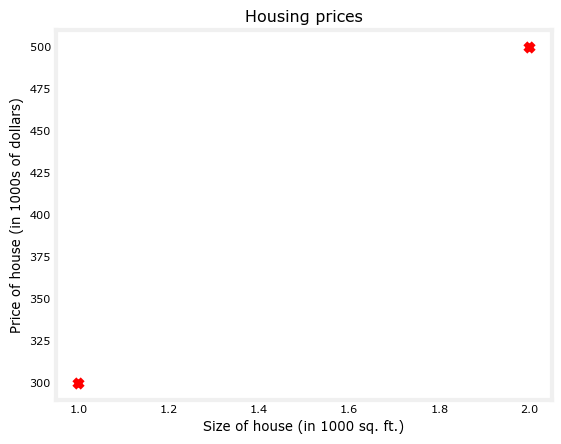

In [72]:
# Visualise the data set
# scatter plot with red cross markers
plt.scatter(x_train, y_train, marker='x', c='r')
# Add title to plot
plt.title('Housing prices')
# Add x and y axis labels
plt.xlabel('Size of house (in 1000 sq. ft.)')
plt.ylabel('Price of house (in 1000s of dollars)')
# Display the plot
plt.show()

## Model function

<img align="left" src="./images/C1_W1_L3_S1_model.png"     style=" width:380px; padding: 10px; " > As described in lecture, the model function for linear regression (which is a function that maps from `x` to `y`) is represented as 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. <br/> <br/> <br/> <br/> <br/> 

Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 100$ and $b = 100$. 

**Note: You can come back to this cell to adjust the model's w and b parameters**

In [73]:
def evaluate_fx(w,x,b):
    """
    Compute model output f_{w,b}^(x(i)) = wx^(i)+b
    Arguments:
    x (ndarray, (m,)) : input feature data, m datapoints
    w,b (scalar) : model parameters
    Returns:
    y (ndarray, (m,)) : predicted target data
    """
    m = len(x);
    y_pred = np.zeros(m)
    for i in range(m):
        y_pred[i] = (w*x[i])+b
    return y_pred

In [74]:
def calc_cost(y_pred, y):
    """
    Calculate the cost function J(w,b) by sum of least squares method:
    1/2m * sum(square(y_pred(i)-y(i)))
    Args:
    y_pred, y (ndarray, (m,)): Array of predicted and actual target datapoints
    Returns:
    J (float): cost function calculation
    """
    J = 0.
    m = len(y_pred)
    for i in range(m):
        J = J+(y_pred[i]-y[i])**2
    return (1/(2*m)*J)
    

In [75]:
# test different values of w and b
w_values = np.arange(0,1000,10)
b_values = np.arange(0,500,10)
J_wb = np.empty([len(w_values),len(b_values)])
for i in range(len(w_values)):
    w = w_values[i]
    for j in range(len(b_values)):
        b = b_values[j]
        # store model output
        y_pred = evaluate_fx(w, x_train, b)
        # populate the cost function
        J_wb[i,j] = calc_cost(y_pred, y_train)

# Minimise the cost function J_wb
optimal_indices = np.where(J_wb == np.amin(J_wb))
# Find model parameter values
w_model = w_values[optimal_indices[0]]
b_model = b_values[optimal_indices[1]]

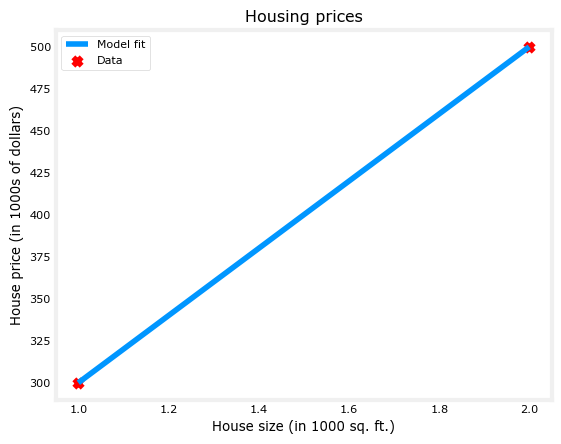

In [76]:
# Plot our linear regression
plt.plot(x_train, evaluate_fx(w_model, x_train, b_model), label='Model fit')
plt.scatter(x_train, y_train, marker='x', c='r', label='Data')
plt.title("Housing prices")
plt.xlabel('House size (in 1000 sq. ft.)')
plt.ylabel('House price (in 1000s of dollars)')
plt.legend()
plt.show()

### Prediction
Now that we have a model, we can use it to make our original prediction. Let's predict the price of a house with 1200 sqft. Since the units of $x$ are in 1000's of sqft, $x$ is 1.2.


In [78]:
# Predict house price for size 1200 sq. ft.
x_test = [1200./1000]
y_test = evaluate_fx(w_model, x_test, b_model)
print(f"Predicted house price for {x_test[0]*1000} sq. ft. is ${y_test[0]*1000}")

Predicted house price for 1200.0 sq. ft. is $340000.0


# Congratulations!
In this lab you have learned:
 - Linear regression builds a model which establishes a relationship between features and targets
     - In the example above, the feature was house size and the target was house price
     - for simple linear regression, the model has two parameters $w$ and $b$ whose values are 'fit' using *training data*.
     - once a model's parameters have been determined, the model can be used to make predictions on novel data.